In [29]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [30]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [31]:
train.isnull().sum() / len(train) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <a list of 20 Patch objects>)

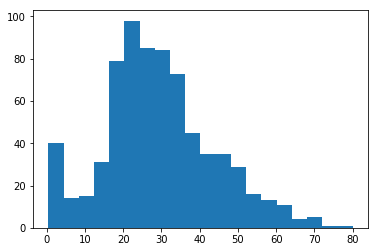

In [32]:
import matplotlib.pyplot as plt
plt.hist(train['Age'].dropna(), bins=20)

In [33]:
import numpy as np
mean = np.mean(train['Age'])
train['Age'] = train['Age'].fillna(mean)

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train["Sex"] = le.fit_transform(train["Sex"])
train.head(1)

# train['Sex'] = train['Sex'].str.replace('female','2')
# train['Sex'] = train['Sex'].str.replace('male','1')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,NaN,S


In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# トレーニングデータを説明変数（ｘ）と目的変数（ｙ）に分割
X = pd.DataFrame({'Pclass':train['Pclass'],
                 'Sex':train['Sex'],
                 'Age':train['Age']})
y = pd.DataFrame({'Survived':train['Survived']})

# 学習用データと検証用データに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

In [41]:
model = SVC(kernel='linear', random_state=None, C = 0.1)
model.fit(X_train, y_train)

C:\Users\fujii\Anaconda3\envs\tesorflow-gpu\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [44]:
model.score(X_test,y_test)

0.7873134328358209